In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

영상을 로딩하여 numpy array로 저장합니다.

pycharm 사용자: cv2.imshow('창이름',img)

Colab 사용자: cv2_show(img)

In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/3DDP/Ch3/

img = cv2.imread('zip.png', 1)
cv2_imshow(img)


RGB to gray scale

방식 1: RGB 채널 값을 이용 (참고: OpenCV에서는 B G R 순서로 저장됨)

Grayscale = 0.299R + 0.587G + 0.114B


In [ ]:
h, w, ch = img.shape

gray1 = np.array((h,w), dtype=np.uint8)
gray1 = 0.11 * img[:,:,0] + 0.587 * img[:,:,1] + 0.299 * img[:,:,2]
cv2_imshow(gray1)


RGB to gray scale

방식 2: OpenCV 함수 이용

In [ ]:
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray2)

Brightness Control

beta = 가중치

crop 적용 (0~255 사이)


In [ ]:
beta = 10

bright1 = img + beta
bright2 = np.clip(img + float(beta), 0, 255)

cv2_imshow(bright1)
cv2_imshow(bright2)

Contrast 조정

Method 1: Linear Transform

I' = a * I

In [ ]:
alpha = 0.5

contrast1 = alpha * img
contrast2 = np.clip(alpha * img , 0, 255).astype(np.uint8)

cv2_imshow(contrast1)
cv2_imshow(contrast2)

Contrast correction
Method2: Min Max


In [ ]:

maxv = np.max(contrast2)
minv = np.min(contrast2)

contrast1 = contrast2
contrast3 = np.clip((contrast2-minv)/(maxv-minv), 0, 1).astype(np.float32)

cv2_imshow(contrast1)
cv2_imshow(contrast3*255.0)

Contrast 조정

Method 3: Gamma correction

Note: All pixel values are in range [0, 1]

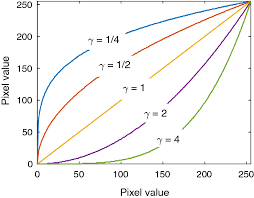

In [ ]:
gamma = 3

imgf = img.copy().astype(np.float32) / 255.0

contrast1 = imgf
contrast4 = np.clip(imgf**gamma, 0, 1).astype(np.float32)

cv2_imshow(contrast1*255.0)
cv2_imshow(contrast4*255.0)